In [91]:
import pickle
import pandas as pd
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [67]:
df = pd.read_csv("ToHacks_Dataset.csv")

In [68]:
df.head()

,Latitude,Longitude,Date,OSM,Forest,Precipitation1,Precipitation2,Damage,Dams,Output_Label
0,34.000,-81.0200,12/2009/25,1634,0,42.3,1.1,4000,19.272862,1
1,34.080,-81.1800,12/2009/25,629,0,39.3,1.1,8000,4.803233,1
2,34.095,-80.9706,12/2009/25,45,0,42.3,1.1,8000,23.426476,1
3,34.720,-80.7700,12/2009/25,13,0,23.3,0.5,10000,17.060388,1
4,34.720,-80.7700,12/2009/25,13,0,23.3,0.5,10000,17.060388,1


In [69]:
df = df.drop_duplicates()

In [70]:
print(len(df))

9972


In [75]:
columns=["OSM", "Forest", "Precipitation1","Precipitation2", "Damage", "Dams"]

Inputs = df.copy()[columns]
Outputs = df.copy().Output_Label

In [76]:
Inputs.head()

,OSM,Forest,Precipitation1,Precipitation2,Damage,Dams
0,1634,0,42.3,1.1,4000,19.272862
1,629,0,39.3,1.1,8000,4.803233
2,45,0,42.3,1.1,8000,23.426476
3,13,0,23.3,0.5,10000,17.060388
5,2,0,53.6,3.0,0,89.436491


In [77]:
Outputs.head()

0    1
1    1
2    1
3    1
5    1
Name: Output_Label, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(Inputs, Outputs, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(pred, y_test))

Model Accuracy: 0.9764411027568922


In [88]:
pred = model.predict(X_test)
print(accuracy_score(pred, y_test))
ConfusionMatrix = confusion_matrix(y_test, pred, normalize='true')
print(ConfusionMatrix)

0.9764411027568922
[[0.97802198 0.02197802]
 [0.02515091 0.97484909]]


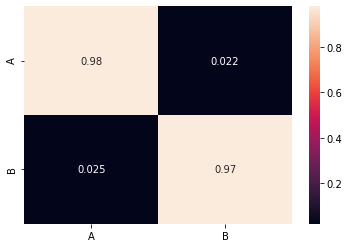

In [90]:
df_cm = pd.DataFrame(ConfusionMatrix, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
sn.heatmap(df_cm, annot=True)

In [97]:
pkl_filename = "pickle_rfcmodel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
lat = 34.012
lon = -81.012

In [94]:
Closest = df.iloc[(df['Latitude']-lat + df['Longitude'] - lon).abs().argsort()[:10]]
Mean_Values = Closest.mean()
Inputs_to_model = Mean_Values[2:8]

Prediction = model.predict([Inputs_to_model])
print(Prediction)

[1]


In [98]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [101]:
pred = pickle_model.predict(X_test)
print("Model Accuracy:", accuracy_score(pred, y_test))

Model Accuracy: 0.9764411027568922
